In [1]:
%matplotlib inline
from itertools import product
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

target area: x=241..275, y=-75..-49

In [2]:
Xin = 241
Xout = 275
Yin = -49
Yout = -75

# Xin = 20
# Xout = 30
# Yin = -5
# Yout = -10

def deepshot(vx, vy, n=0, ymax=0):
    global Xin, Xout, Yin, Yout
    
    if n > vx:
        x = vx * (vx + 1) / 2
    else:
        x = n * (vx - (n+1)/2)
    y = n * (vy - (n+1)/2)
    if y > ymax:
        ymax=y
    in_zone = (y <= Yin and x >= Xin) and (y >= Yout and x <= Xout)
    missed = y < Yout or x > Xout
    if in_zone:
        return True, ymax
    if missed:
        return False, None
    n += 1
    return deepshot(vx, vy, n=n, ymax=ymax)

In [3]:
broj = 0
ymaxes = []
speeds = set()
for vx, vy in product(np.arange(500), np.arange(-200, 175)):
    test, ymax = deepshot(vx, vy)
    if test:
        broj += test
        ymaxes.append(ymax)
        speeds.add((vx, vy))
        # print(vx, vy)

In [4]:
# Part 1
max(ymaxes)

2775.0

In [5]:
# Part 2:
broj - 1

1566

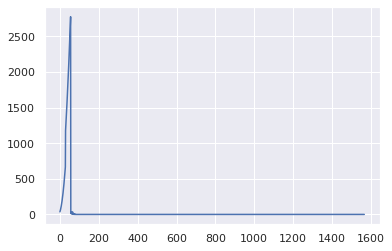

In [6]:
plt.plot(ymaxes)

In [7]:
x_brzine = []
y_brzine = []

for a, b in speeds:
    x_brzine.append(a)
    y_brzine.append(b)

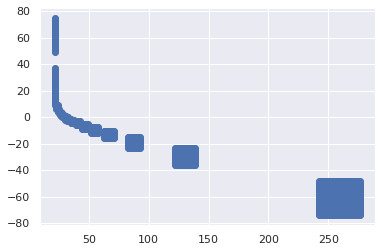

In [8]:
plt.plot(x_brzine, y_brzine, 'o');